## Проектная работа "Проверка гипотез для увеличения выручки крупного интернет-магазина"

В рамках проекта будут протестирован список гипотез, разработанный совместно с отделом маркетинга, для увеличения выручки интернет-магазина.
Основными задачами проекта являются:
1) Приоритизация гипотез;

2) Изучение и анализ A/B-теста;

3) Вывод исходя из результатов анализа

### Часть 1. Приоритизация гипотез.

In [1]:
#импортируем библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from pandas.plotting import register_matplotlib_converters
import warnings
import scipy.stats as stats
pd.options.display.max_colwidth = 210

In [2]:
#открываем файлы 
try:
    hypothesis= pd.read_csv('/datasets/hypothesis.csv')
except FileNotFoundError:
    hypothesis= pd.read_csv('hypothesis.csv')
#приведем названия столбцов к нижнему регистру
hypothesis.columns = ['hypothesis', 'reach', 'impact', 'confidence', 'efforts']
display (hypothesis)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
#открываем файлы 
try:
    orders= pd.read_csv('/datasets/orders.csv')
except FileNotFoundError:
    orders= pd.read_csv('orders.csv')

orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [4]:
#открываем файлы 
try:
    visitors= pd.read_csv('/datasets/visitors.csv')
except FileNotFoundError:
    visitors= pd.read_csv('visitors.csv')

visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [5]:
#применим фреймворк ICE для приоритизации гипотез
hypothesis['ICE'] = ((hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']).round()
display (hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending = False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.0


In [6]:
#применим фреймворк RICE для приоритизации гипотез
hypothesis['RICE'] = (hypothesis['impact']*hypothesis['confidence']*hypothesis['reach'])/hypothesis['efforts']
display (hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending = False))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


В результате применения методов приоритизации гипотез ICE и RICE мы видим, что наиболее перспективными гипотезами являются 0, 2, 6, 7 и 8. При этом по итогам применения ICE первое место занимает гипотеза 8, по итогам применения RICE - 7. Данное различие объясняется учетом параметра REACH (охват) при расчете RICE и, поскольку у 7 гипотезы данный параметр равен 10 (наибольший из всех, к примеру, у гипотезы 8 параметр равен 1), данная гипотеза является самой перспективной из всех.

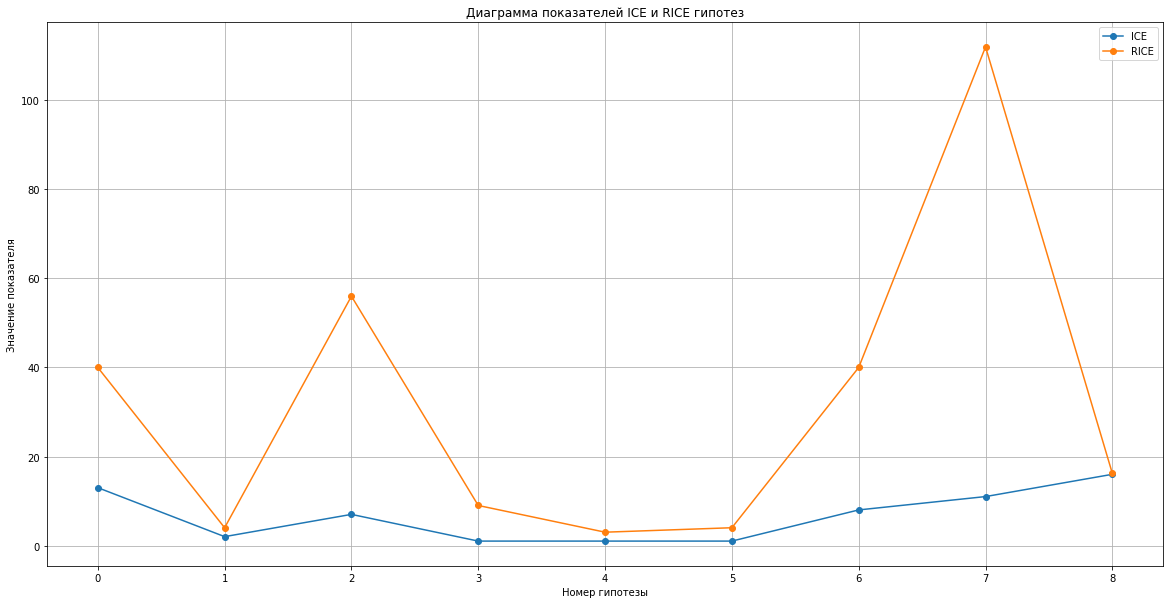

In [7]:

hypothesis_extra = hypothesis[['hypothesis', 'ICE', 'RICE']]
hypothesis_extra.plot(grid=True, style='o-', figsize=(20,10))
plt.title('Диаграмма показателей ICE и RICE гипотез')
plt.xlabel('Номер гипотезы')
plt.ylabel('Значение показателя');

### Часть 2. Анализ A/B-теста

In [8]:
#начнем с предобработки данных
orders.info()
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [9]:
#определение количества групп
orders['group'].unique()
visitors['group'].unique()

array(['A', 'B'], dtype=object)

In [10]:
#период полученных данных
print ('Начало: ', orders['date'].min())
print ('Конец: ', orders['date'].min())
print (' ')
print ('Начало: ', visitors['date'].min())
print ('Конец: ', visitors['date'].max())

Начало:  2019-08-01 00:00:00
Конец:  2019-08-01 00:00:00
 
Начало:  2019-08-01 00:00:00
Конец:  2019-08-31 00:00:00


Всего в А/В-тесте транзакции пользователей разделены на 2 группы: А и В. Анализ проводится по данным, полученным за август 2019 года.

In [11]:
#определим кол-во уникальных пользователей в группах
print (orders.groupby('group').agg({'visitorId':'nunique'}))
print ((orders.groupby('group').agg({'visitorId':'nunique'}) / 
        orders.groupby('group').agg({'visitorId':'nunique'}).sum()*100).round())

       visitorId
group           
A            503
B            586
       visitorId
group           
A           46.0
B           54.0


Всего пользователей в группе А - 503, что составляет 46% от общего числа пользователей, принимающих участие в тесте. В группе В - 586, что составляет 54%.

In [12]:
#найдем кол-во пользователей, которые попадают в обе группы
orders.groupby('visitorId').agg({'group' : 'nunique'}).query('group>1').count()

group    58
dtype: int64

In [13]:
#построим график кумулятивной выручки по группам
#для этого соберём агрегированные кумулятивные по дням данные о заказах 
datesGroups = orders[['date','group']].drop_duplicates() 

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display (cumulativeData.head(5)) 

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


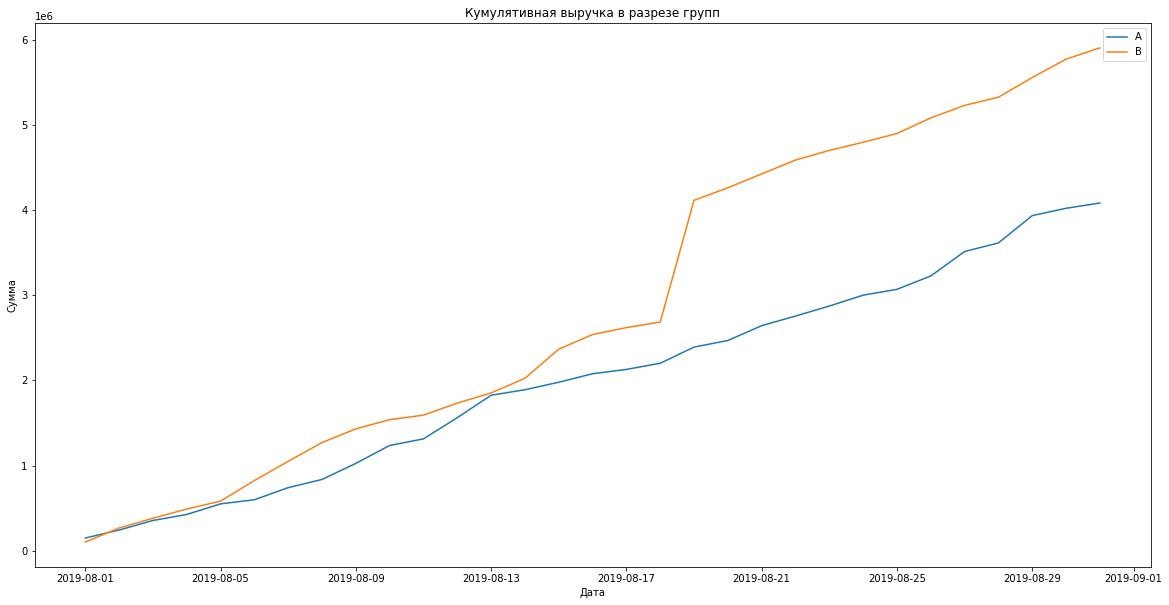

In [14]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders', 'visitors']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders', 'visitors']]
plt.figure(figsize=(20, 10))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()
plt.title('Кумулятивная выручка в разрезе групп')
plt.xlabel('Дата')
plt.ylabel('Сумма');

По обеим группам выручка  увеличивается в течение всего теста, но неравномерно, по группе В наблюдается наиболее значительный рост, в т.ч. есть точки, когда выручка резко растет. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. 

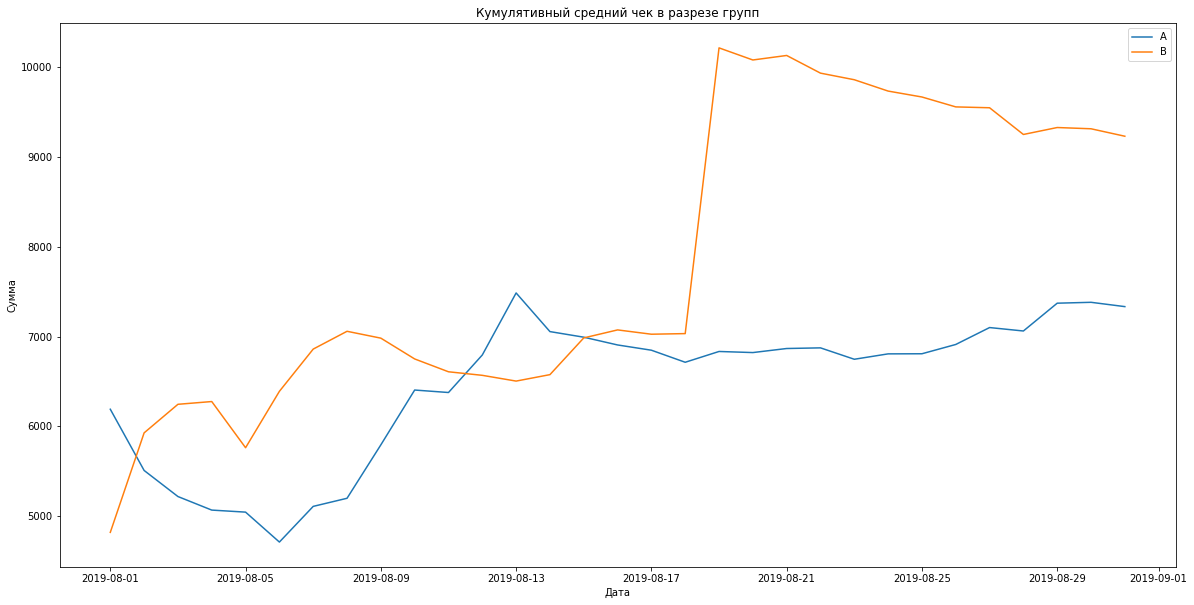

In [15]:
#построим графики среднего чека по группам 
plt.figure(figsize=(20, 10))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.title('Кумулятивный средний чек в разрезе групп')
plt.xlabel('Дата')
plt.ylabel('Сумма');

Средний чек также существенно разнится, по группе В он существенно выше и имеет резкий рост в одном из периодов, при этом средний чек группы А является более стабильным после 13 августа.

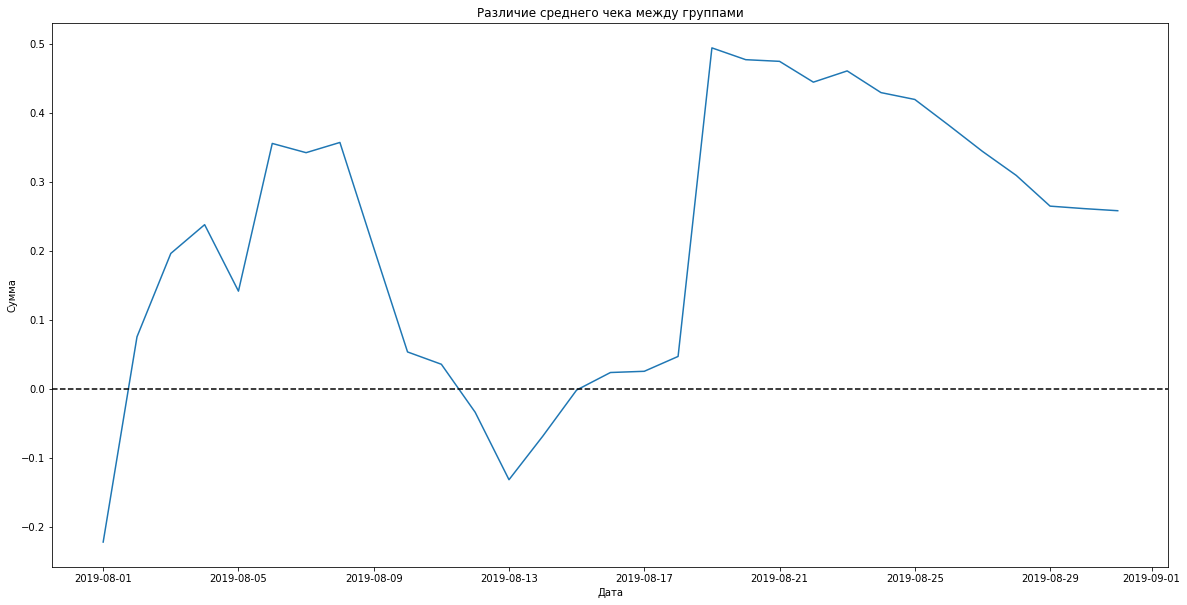

In [16]:
#построим график относительного различия для среднего чека между группами

mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(20, 10))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.title('Различие среднего чека между группами')
plt.xlabel('Дата')
plt.ylabel('Сумма');

На графике также присутствуют точки, когда имеются существенный рост и падения. Наибольший скачок призошел после 17 августа по группе В, при этом до этого момента в период с 9 августа по 17 августа средние чеки по группам находились примерно на одно уровне.

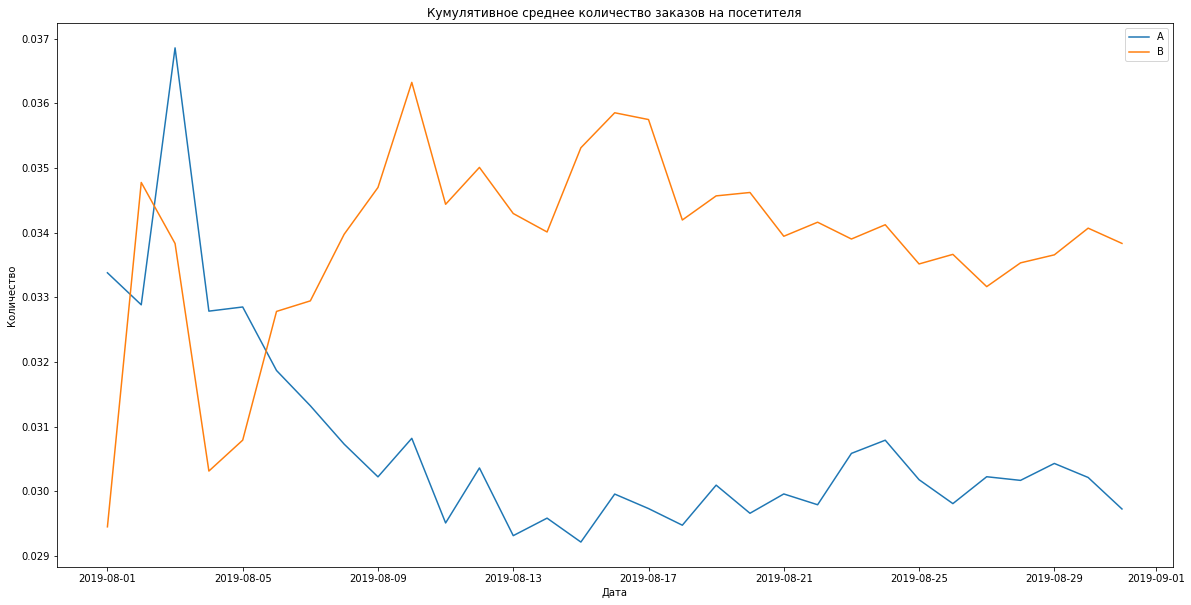

In [17]:
#построим график среднего количества заказов на посетителя по группам
plt.figure(figsize=(20, 10))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['orders']/cumulativeRevenueA['visitors'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['orders']/cumulativeRevenueB['visitors'], label='B')
plt.legend()
plt.title('Кумулятивное среднее количество заказов на посетителя')
plt.xlabel('Дата')
plt.ylabel('Количество');

Исходя из графика видно, что количество заказов на одного посетителя существенно выше в группе В, вероятно, этот фактор и находит свое отражение в превышении группы В над группой А по показателям выручки и среднего чека. 

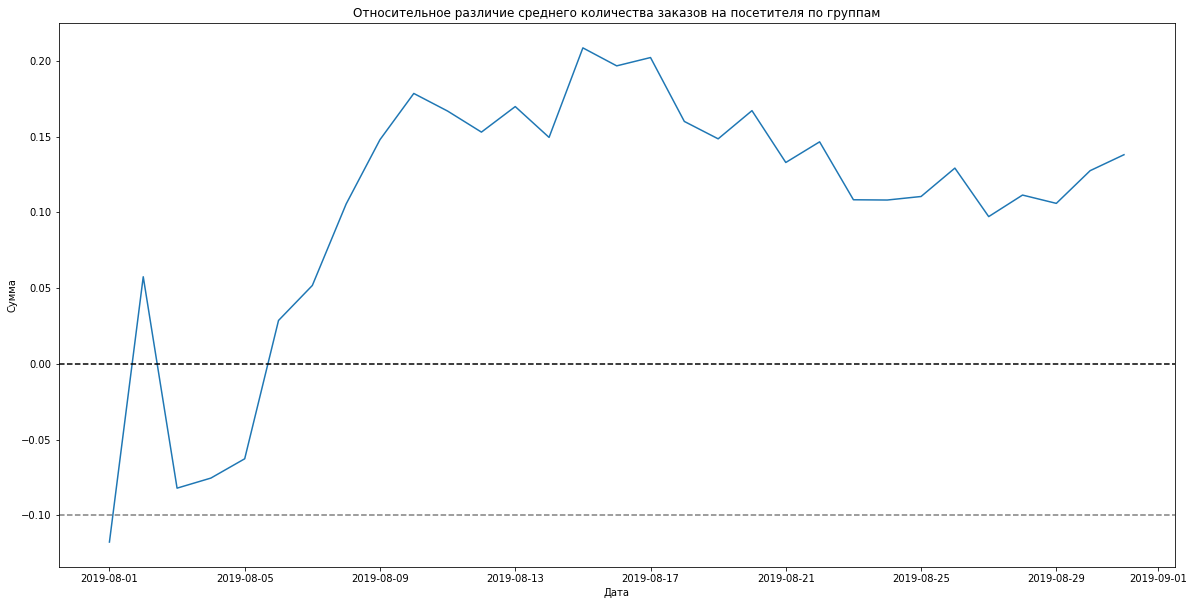

In [18]:
#построим график относительного различия среднего количества заказов на посетителя по группам

cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(20, 10))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

plt.title('Относительное различие среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Сумма')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--');

График подтверждает предыдущие выводы, количество заказов на одного посетителя в группе В стабильно превышает количество в группе А. В начале теста группа B проигрывала группе A, затем вырвалась вперёд.

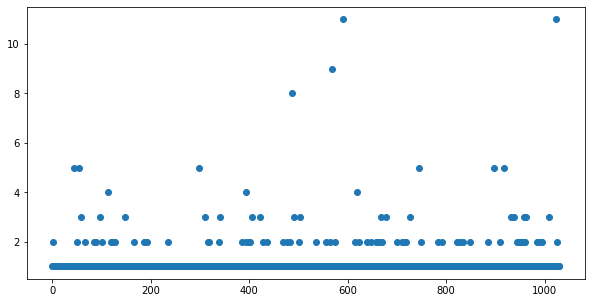

In [19]:
#построим точечный график количества заказов по пользователям. 
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['visitorId', 'orders']

x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(10, 5))
plt.scatter(x_values, ordersByUsers['orders']);

По графику видно, что большинство покупателей заказывали только один раз. Однако доля пользователей с 2 заказами тоже значительна.

In [20]:
#посчитаем 95-й и 99-й перцентили количества заказов на пользователя
display (np.percentile(ordersByUsers['orders'], [90, 95, 99])) 

array([1., 2., 4.])

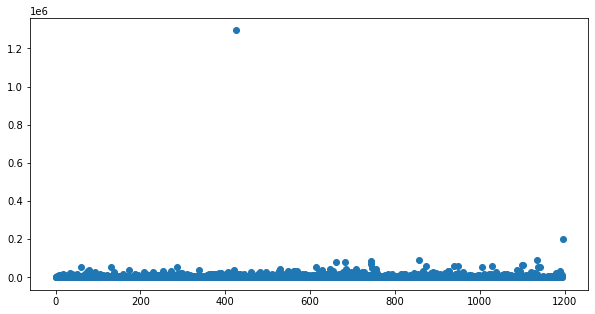

In [21]:
#построим точечный график стоимостей заказов
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(10, 5))
plt.scatter(x_values, orders['revenue']);

По графику можно выбрать границу аномальных заказов более 20 тыс.руб.

In [22]:
#посчитаем 95-й и 99-й перцентили стоимости заказов
display (np.percentile(orders['revenue'], [90, 95, 99])) 

array([18168. , 28000. , 58233.2])

Таким образом, только у 5% пользователей сумма заказа вышла более 28 тыс.руб., целесообразно принять данное число за верхнюю границу стоимости заказов.

In [23]:
#примем за аномальных пользователей тех, кто совершил от 3 заказов или совершил заказ дороже 28 000 рублей. 
orders_max = 2
revenue_max = 28000

In [24]:
#посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. 
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visitorsADaily['visitorsPerDateA'].sum() 
                                                                           - len(ordersByUsersA['orders'])), 
                                                        name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visitorsBDaily['visitorsPerDateB'].sum() 
                                                                           - len(ordersByUsersB['orders'])), 
                                                        name='orders')],axis=0)
print ('P-value', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print ('Прирост', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))


P-value 0.017
Прирост 0.138


Сформулировали 2 гипотезы - Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть. Принимаем уровень значимости - 0.05. 

Исходя из полученных данных, поскольку p-value менее 0.05 мы отвергаем нулевую гипотезу и признаем, что различия в среднем между группами имеются.

In [25]:
#посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)
print ('P-value', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print ('Прирост', '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

P-value 0.729
Прирост 0.259


Поскольку P-value больше уровня значимость 0.05, следовательно, различий в среднем чеке между группами нет, при этом относительное различие - 25.9%

In [26]:
#посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > orders_max]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > orders_max]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > revenue_max]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print ('P-value','{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print ('Прирост','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

P-value 0.013
Прирост 0.173


Можно сказать, что результаты особо не изменились, т.е. влияние аномалий на результаты А/В-теста не существенно.

In [27]:
#посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным
print ('P-value',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)
print ('Прирост',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)
        

P-value 0.738
Прирост -0.020


После очистки статистическая значимость все также сохраняется, при этом преимущество группы В упало на 28%.

### Часть 3. Вывод

Исходя из проведенного анализа результатов А/В-теста получили следующие итоги:
- Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий.
- По сырым данным нет статистически значимого различия по среднему чеку между группами. Однако после удаления аномалий статистически значимое различие есть.
- График различия кол-ва заказов на покупателя между группами сообщает, что результаты группы B лучше группы A.

Таким образом, считаю целесообразным остановить тест и признать его успешным.